In [1]:
# useful lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Read the csv file
df= pd.read_csv("titanic-passengers.csv", sep=';')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=891, step=1)

From the index there is 891 instance in the dataset

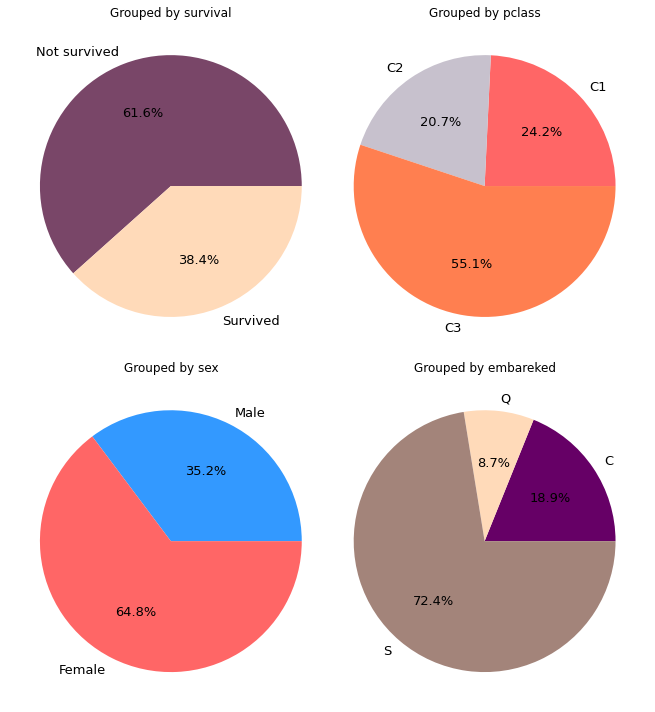

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
# (0,0)

axes[0,0].set_title('Grouped by survival')
axes[0,0].pie(df.groupby('Survived')['Survived'].count(), labels=['Not survived', 'Survived'],
              colors= ['#794668','#ffdab9'], autopct='%1.1f%%', textprops={'fontsize':13})
# (0,1)
axes[0,1].set_title('Grouped by pclass')
axes[0,1].pie(df.groupby('Pclass')['Pclass'].count(), labels=['C1', 'C2', 'C3'],
               colors= ['#ff6666','#c7c1cd','#ff7f50'],autopct='%1.1f%%', textprops={'fontsize':13})
# (1,0)

axes[1,0].set_title('Grouped by sex')
axes[1,0].pie(df.groupby('Sex')['Sex'].count(), labels=['Male', 'Female'],colors=['#3399ff','#ff6666'],autopct='%1.1f%%', textprops={'fontsize':13})

# (1,1)
axes[1,1].set_title('Grouped by embareked')
axes[1,1].pie( df.groupby('Embarked')['Embarked'].count(),  labels=['C', 'Q', 'S'],
             colors=['#660066','#ffdab9','#a3847a'], autopct='%1.1f%%', textprops={'fontsize':13})

# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.6, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)

plt.tight_layout()                             # Avoid overlapping.
plt.show()

Comments from the above: 
- 62% didn't survive
- There is more female than male
- Most passengers are in 3 class
- More people embreked from Southampton port 

In [6]:
# important info
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [7]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,699,No,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
882,775,Yes,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
883,809,No,2,"Meyer, Mr. August",male,39.0,0,0,248723,13.0000,NaN,S
884,278,No,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
885,150,No,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


Just visualizung the head and the tail of the dataset i notice:
- the cabin column contines NaN values ( 18/20)  
- Also Age column 1 out 20 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum().sum()

866

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As noticed before:
- Cabin has 687 NaN values
- Age has 177 Nan 
- Embarked with 2 missing values


Next step is cleaning
To clear the dataset i will process like folowing:
- Age: will be replaced by the median value 
- Embarked: is categorical value then i have to replace it with the most frequent value
- Cabin: i would like to see if there is a correlation betweene the Cabin and the ticket if so then it must be replaced according to Ticket else it has to be droped

In [11]:
# Cleaning Age column

df['Age'].fillna(df['Age'].mean(), inplace =True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# cleaning Embarked 
# Cheking most frequent value 
freq=df['Embarked'].value_counts().idxmax()
freq

'S'

In [13]:
# Replacing missing values by 'S' 
df['Embarked'].fillna(freq, inplace =True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
# Cleaning Cabin

# Selecting rows where Cabin not null
pd.set_option('display.max_rows',None)
Cabin_not_null=df[~df['Cabin'].isna()]
Cabin_not_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.00,B71,S
16,378,No,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C
19,225,Yes,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.00,C93,S
26,588,Yes,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C


In [15]:
# creating column Cabin part from Cabin in dataframe of non missing values of Cabin
Cabin_not_null['Cabin part']= Cabin_not_null['Cabin'].str[0]
Cabin_not_null.drop("Cabin", axis=1, inplace=True)
Cabin_not_null.columns

C:\Users\HP\AppData\Local\Temp/ipykernel_24000/2399673457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cabin_not_null['Cabin part']= Cabin_not_null['Cabin'].str[0]
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Cabin part'],
      dtype='object')

No handles with labels found to put in legend.


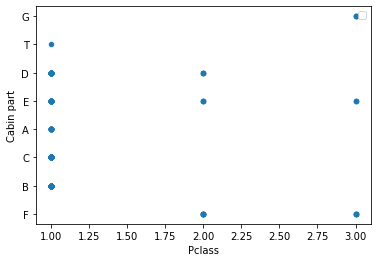

In [16]:
Cabin_not_null.plot.scatter(x='Pclass', y='Cabin part')
plt.legend()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


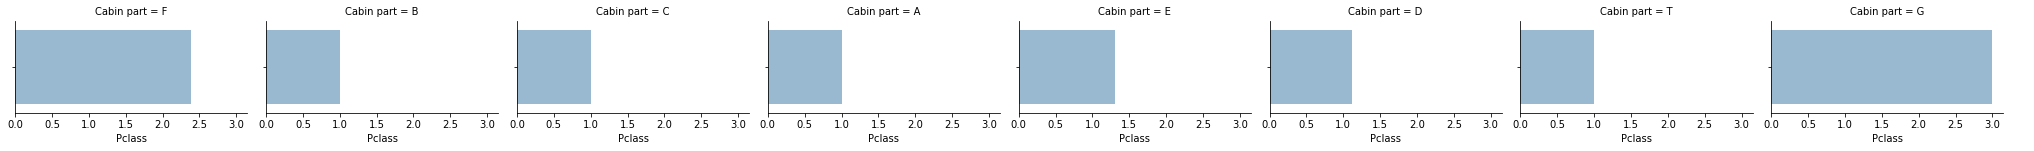

In [17]:
grid = sns.FacetGrid(Cabin_not_null, col="Cabin part", size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Pclass', alpha=.5, ci=None)
grid.add_legend()

From Bar and scatter plot i will replace Cabin missing values as folowing :
- Pclass = 1 , one of the folowing cabin part {A, B, C, T, E}
- Pclass = 2 , {D, E}
- Pclass = 3 , {G, E}

In [18]:
df['Cabin'].fillna('null', inplace =True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [20]:
import numpy as np
import random 
def Clean (a,b):
    if(a == 'null'):
        if(b==1):
            return np.random.choice(['A','B','C','T','E'])
        if(b==2):
            return np.random.choice(['D','E'])
        if(b==3):
            return np.random.choice(['E','G'])
    else:
        return a
   
    

In [21]:
df['Bloc']=df.apply(lambda row: Clean(row['Cabin'], row['Pclass']), axis=1)

In [22]:
df['Bloc']=df['Bloc'].str[0]

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Bloc
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,null,S,E
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,F
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,null,S,E
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,null,S,E
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,B


In [24]:
df.drop("Cabin", axis=1, inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Bloc'],
      dtype='object')

In [25]:
# The dataset is ready to be treated
# Visualisation


Important featres: Pclass, Sex, Age, Bloc, reletives= SibSp+Parch

In [26]:
df['Relatives']= df['Parch']+df['SibSp']
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Bloc', 'Relatives'],
      dtype='object')

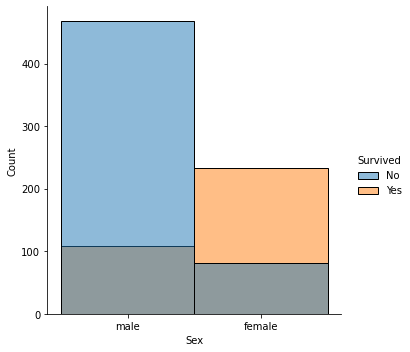

In [27]:
# Distribution of Sex
sns.displot(data=df, x="Sex", hue= "Survived")

More than 50% of women have survived compared to men 70% hass not so the gender could have an impact on chance of survival

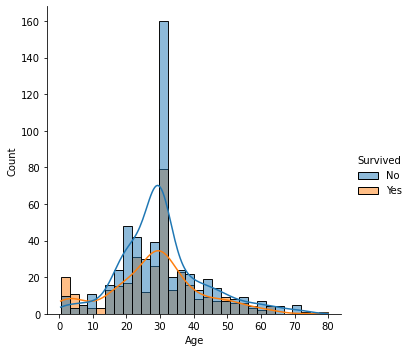

In [28]:
# Distribution of Age

sns.displot(data=df, x="Age",hue= "Survived", kde=True)

- The distribution of the passengers is varied concerning the age from 1 year to 80 years but the most frequent range is the end of the twenties and the beginning of the thirties 
- Almost the non survivors are more than the survivors except in the case where the person is less than 20 years old (children and the teenagers).

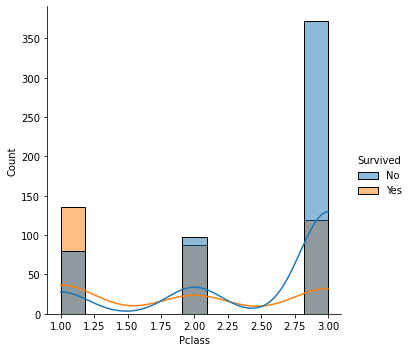

In [29]:
# Distribution of Pclass
sns.displot(data=df, x="Pclass",hue= "Survived", kde=True)

- The majority of the passengers are from 3 classes almost double the number of the other two classes counted together.
- The only class where the number of survivors exceeds the number of non survivors is the first class, the 2 class almost equal but in the 3 class more than 50% didn't survive.
- Probably the class has an impact on the chance of survival.

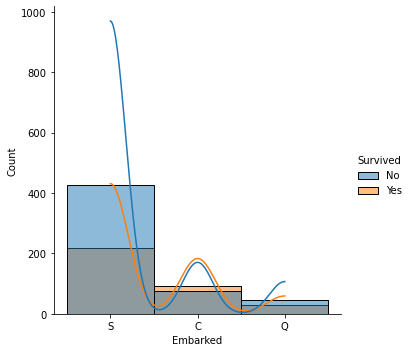

In [30]:
# Distribution of Emberked
sns.displot(data=df, x="Embarked",hue= "Survived", kde=True)

- More passengers are embarked from port S.
- The number of people embarked from port C, Q almost equals the number of survivors and not survivors, while in port S almost the majority didn't survive.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


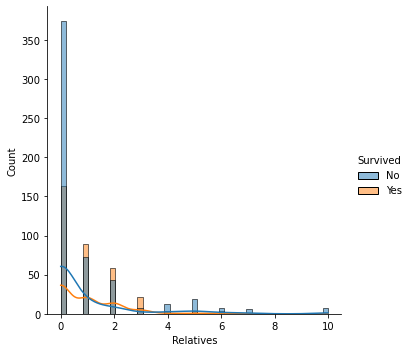

In [31]:
# Distribution of Emberked
sns.displot(ax=axes[0, 0],data=df, x="Relatives",hue= "Survived", kde=True)

- People with 1 to 3 relatives have survived more than the others who have more than 3, but what surprises me is that they are even more likely to survive than people with no relatives

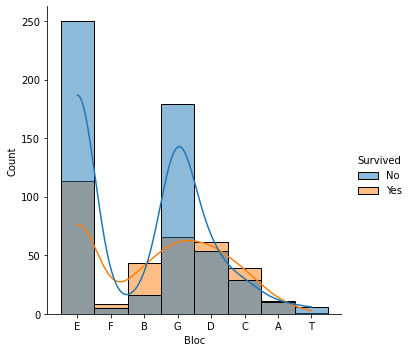

In [32]:
sns.displot(data=df, x="Bloc",hue= "Survived", kde=True)

- The distribution of passengers is varied between the zones: A,B,D,E,F,G,T
- The areas where the number of survivors is greater than the non-survivors: B,C,D,F. 
- A and T almost equal 
- The number of non-survivors in E and G is almost double that of the survivors.

In [33]:
# Combined features 

# Sex, Age, Survived

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


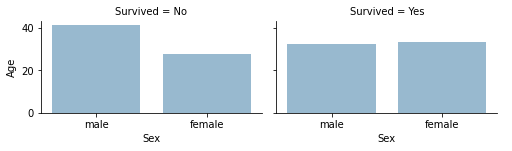

In [34]:
grid = sns.FacetGrid(Cabin_not_null, col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot,'Sex', 'Age', alpha=.5, ci=None)
grid.add_legend()

- The survivors are less than 40 years old, the gender doesn't affect that much in this case but for the non survivors there is more male than female

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


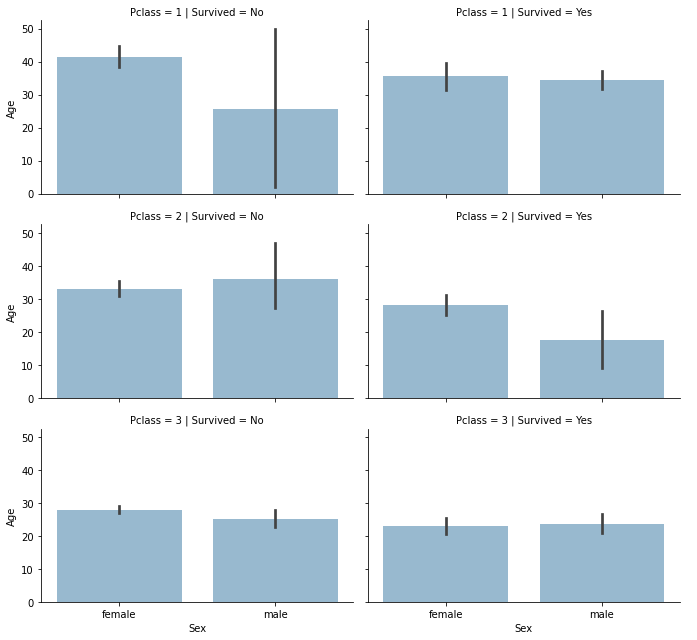

In [35]:
# Combined features 

# Sex, Age, Survived, Pclass
grid = sns.FacetGrid(df, row='Pclass', col='Survived', aspect=1.6)
# something strange is happening here; this isn't right
grid.map(sns.barplot, 'Sex','Age', alpha=.5)
grid.add_legend()

- The age range in the 2 and 3 classes is less than 30 years old against 1 class up to 40 years old 
- The number of survivors is higher for the passenger of the 1 class.
- For the three classes in the case of survival the number of female is more than male.
- For the 2 and 3 classes in the case of non-survived the number of female and male is almost equal while for the 1 class there are more non-survived female than male

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


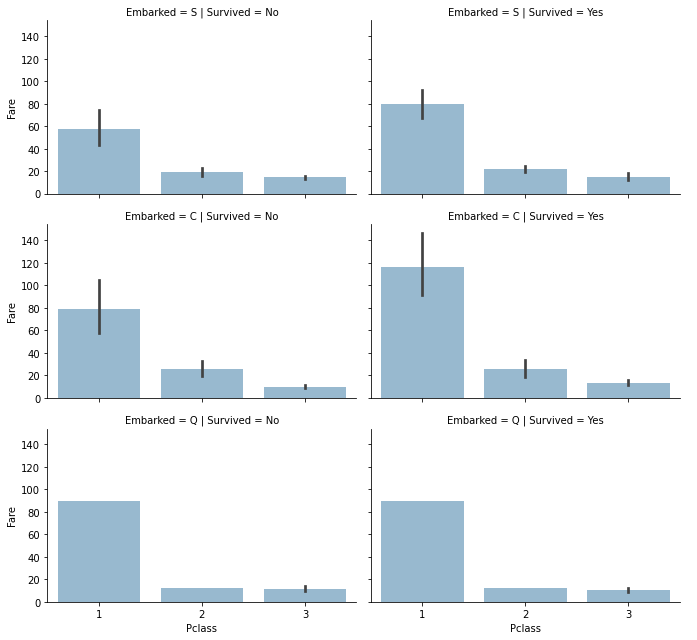

In [36]:
# Combined features 

# Pclass, Fare, Survived, Embarked
grid = sns.FacetGrid(df, row='Embarked', col='Survived', aspect=1.6)
# something strange is happening here; this isn't right
grid.map(sns.barplot, 'Pclass','Fare', alpha=.5)
grid.add_legend()

- In both cases (survived or not) whatever the port of embarkation the number of passengers of the 1 class is higher than the other classes.
- Passengers who have not survived the price of their ticket is cheaper than the survivors in the case of the 3 ports.
- The most expensive ticket price and the Q port=> the highest number of survivors  

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


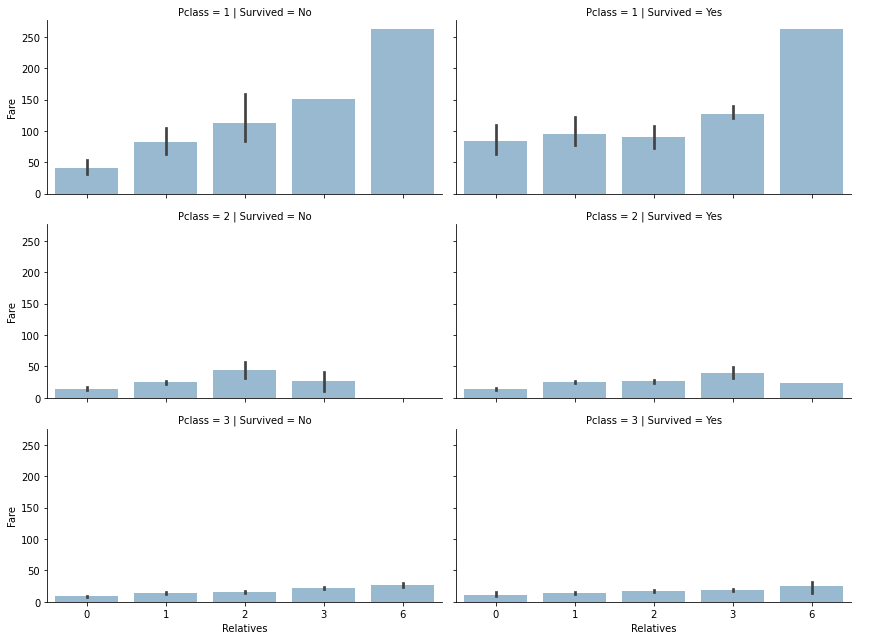

In [37]:
# Combined features 

# Pclass, Fare, Survived, Relatives
grid = sns.FacetGrid(df, row='Pclass', col='Survived', aspect = 2)
# something strange is happening here; this isn't right
grid.map(sns.barplot,'Relatives', 'Fare',alpha=.5)
grid.add_legend()

In [38]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

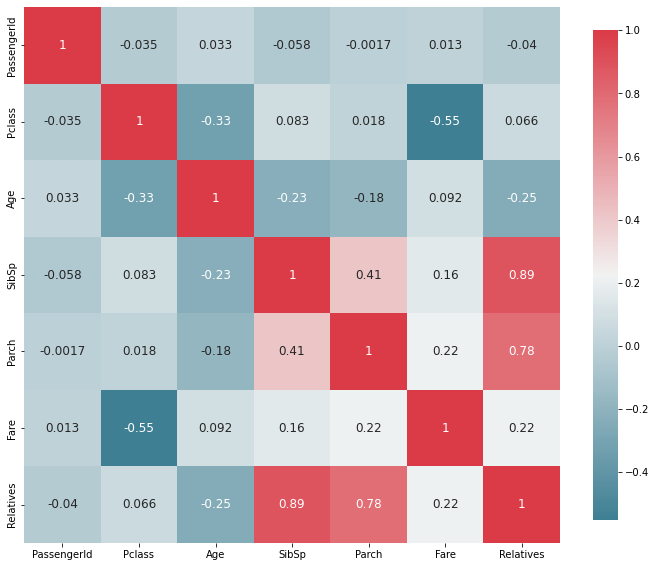

In [39]:
plot_correlation_map(df)

- It gives the correlations between the different columns.
- Columns are positively correlated : (Parch, Sibs ), 
- Columns are negatively correlated:(Pclass, Fare),(Pclass, Age)
- The highest correlation is between:(Pclass, Fare)
- Non-correlated Columns :(PassengerId, Parch)

In [40]:
df.replace({"Survived":{"Yes":1,"No":0}}, inplace=True)
df[["Survived","Pclass"]].groupby(["Survived"], as_index=True).mean()

,Pclass
Survived,
0,2.531876
1,1.950292


In [41]:
import seaborn as sns
df["Title"]=df["Name"].str.lower().str.extract('([a-z]*\.)', expand=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Bloc,Relatives,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,E,0,mr.
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,F,0,mr.
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,E,0,mr.
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,E,4,mrs.
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,B,1,mr.


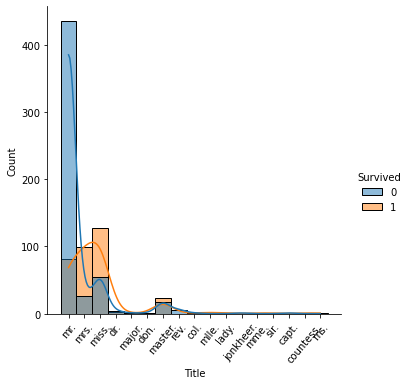

In [42]:
f= sns.displot(data=df, x="Title",hue= "Survived", kde=True)
f.set_xticklabels(rotation=50)

- More title passengers mr
- Number of survived almost double of non survived for miss and mrs
- The majority of mr's didn't survived

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


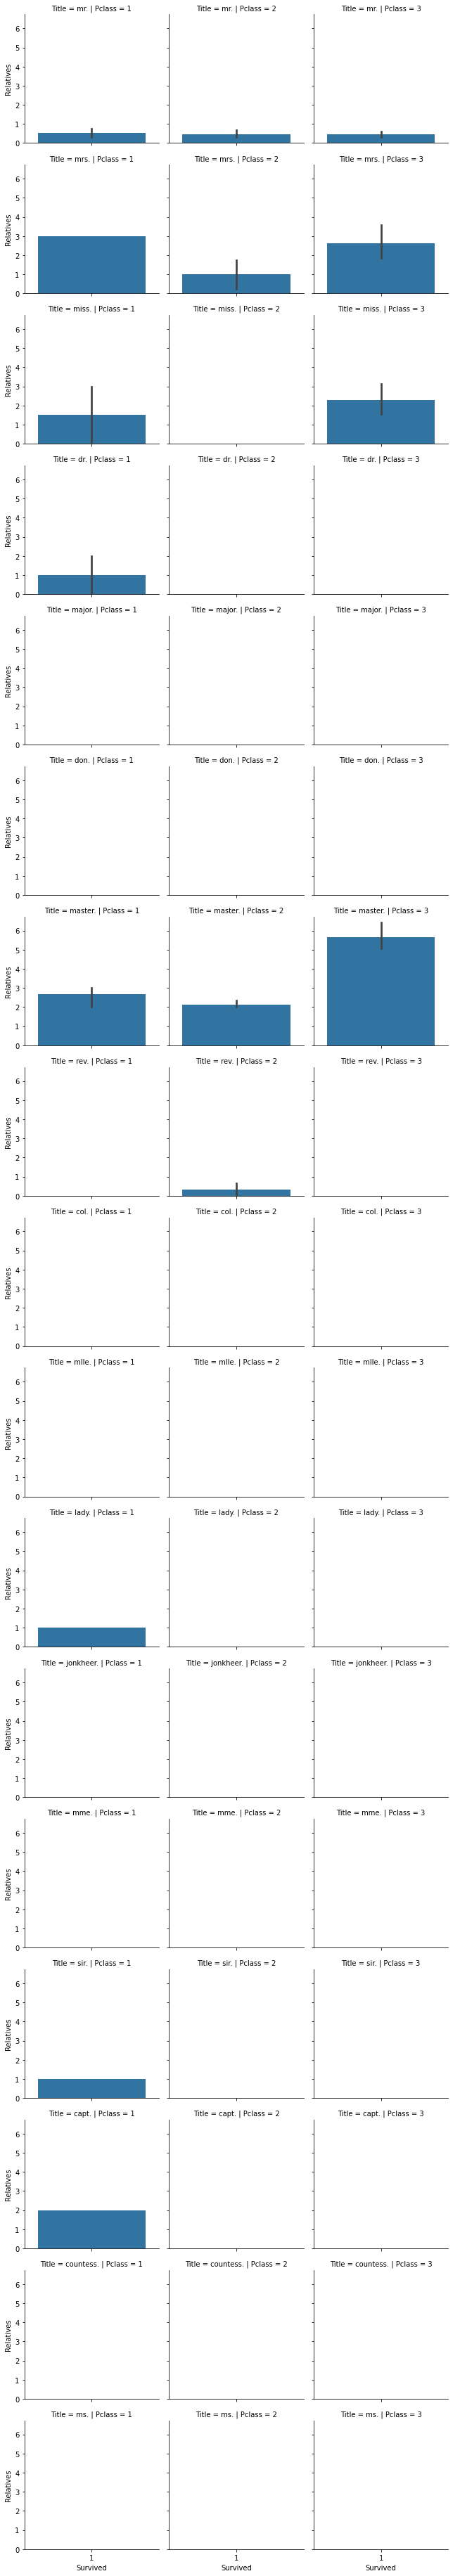

In [43]:
grid = sns.FacetGrid(df, row="Title", col="Pclass")
grid.map(sns.barplot,'Survived','Relatives')
grid.add_legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


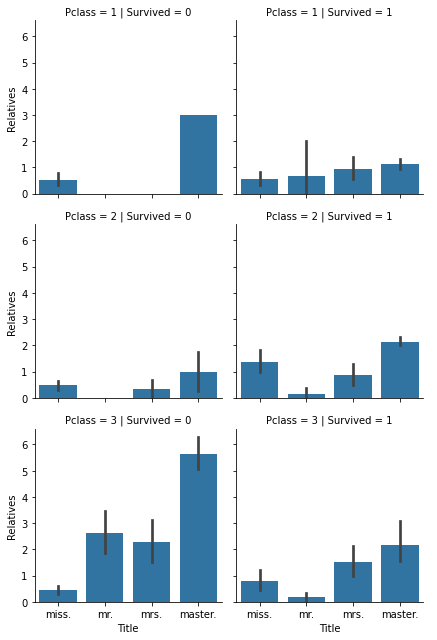

In [44]:
grid = sns.FacetGrid(df, row="Pclass", col="Survived")
grid.map(sns.barplot,'Title','Relatives')
grid.add_legend()

- The highest number of non-survivors is in the case: passengers of class 3 of master title with more than 5 relative.
- The highest number of survivors is in the case: passengers of class 2,3 of master title with 2 relative.

In [45]:
import numpy as np
Title_Dictionary = {

                    "capt.":       "Officer",

                    "col.":        "Officer",

                    "major.":      "Officer",

                      "dr.":         "Officer",

                    "rev.":        "Officer",

                    "jonkheer.":   "Royalty",

                    "don.":        "Royalty",

                    "sir." :       "Royalty",

                   "lady." :      "Royalty",

                  "countess.": "Royalty",

                    "dona.":       "Royalty",

                    "mme.":        "Miss",

                    "mlle.":       "Miss",

                    "miss." :      "Miss",

                    "ms.":         "Mrs",

                    "mr." :        "Mrs",

                    "mrs." :       "Mrs",

                    "master." :    "Master"
}


In [46]:
clean_Title={
   "Title": Title_Dictionary 
}

In [47]:
df.replace(clean_Title, inplace= True)
df['Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


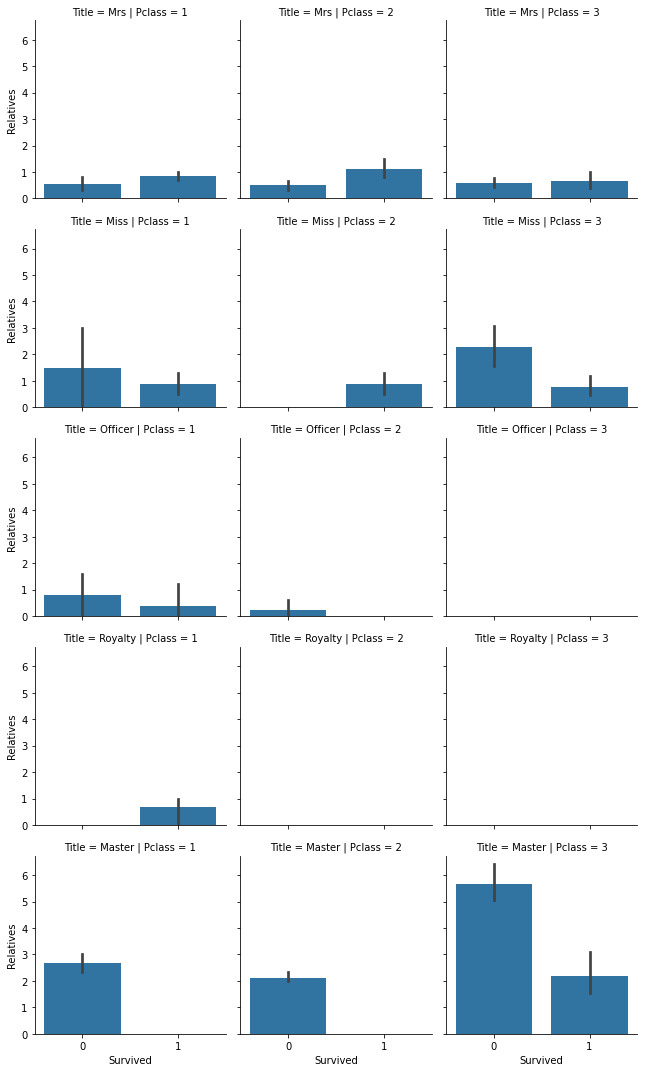

In [48]:
grid = sns.FacetGrid(df, row="Title", col="Pclass")
grid.map(sns.barplot,'Survived','Relatives')
grid.add_legend()

- In general the number of relatives is under 2 for all cases except for the class 3
- The highest number of non-survivors is in the case: passengers of class 3 of master title with more than 5 relative.
- The highest number of survivors is in the case: passengers of class 2,3 of master title with 2 relative.
- Passengers with Miss title have more chance to survive whatever the class was.
- Passengers with officer title have less chance to survive if the class is 1 or 3.

FamilySize i have already created Relatives feature .

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Bloc         891 non-null    object 
 12  Relatives    891 non-null    int64  
 13  Title        891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [50]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Name'].astype(str)
df['Sex']=encoder.fit_transform(df['Sex'])
df['Ticket']=encoder.fit_transform(df['Ticket'])
df['Embarked']=encoder.fit_transform(df['Embarked'])
df['Bloc']= encoder.fit_transform(df['Bloc'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
 11  Bloc         891 non-null    int32  
 12  Relatives    891 non-null    int64  
 13  Title        891 non-null    object 
dtypes: float64(2), int32(4), int64(6), object(2)
memory usage: 83.7+ KB


In [51]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Bloc,Relatives,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,159,13.0000,2,4,0,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,347,7.6500,2,5,0,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,409,7.8542,2,4,0,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,395,21.0750,2,4,4,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,569,52.0000,2,1,1,Mrs
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",1,37.0,2,0,245,7.9250,2,6,2,Mrs
6,576,0,3,"Patchett, Mr. George",1,19.0,0,0,420,14.5000,2,6,0,Mrs
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.0,0,2,187,15.7417,0,6,2,Miss
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",1,20.5,0,0,525,7.2500,2,4,0,Mrs
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.0,1,0,627,26.0000,2,4,1,Mrs


In [52]:
X=df[['Sex','Age','Relatives','Bloc','Fare','Parch','Title','Embarked','Pclass']] # selected features 
Y= df['Survived']# select the target survived

In [53]:
Z= X.join(Y)
Z.to_csv("titanic.csv", index=False)

In [54]:
# split  data into train and test test_size =0.3
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.30, random_state=123)

In [55]:
X_train['Title']= encoder.fit_transform(X_train['Title'])

C:\Users\HP\AppData\Local\Temp/ipykernel_24000/1275896883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Title']= encoder.fit_transform(X_train['Title'])


In [56]:
X_test['Title']= encoder.transform(X_test['Title'])

C:\Users\HP\AppData\Local\Temp/ipykernel_24000/2722298747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Title']= encoder.transform(X_test['Title'])


In [57]:
def normalize (df):
    features= df.columns
    for column in features:
        mu = df[column].mean()
        sigma = df[column].std()
        df[column] = (df[column] - mu)/sigma

In [58]:
normalize(X_train)
normalize(X_test)

C:\Users\HP\AppData\Local\Temp/ipykernel_24000/2423762491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = (df[column] - mu)/sigma


In [59]:
model =LogisticRegression(fit_intercept=True)
model.fit(X_train.values,Y_train.values)
Y_pred = model.predict(X_test)
score =accuracy_score(Y_test,Y_pred) 
score

0.8022388059701493

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

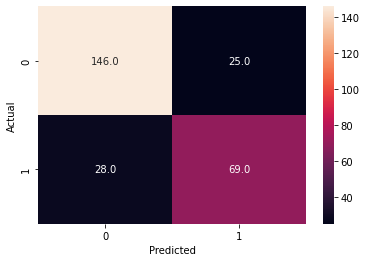

In [60]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt=".1f")

- True positive > False positive (73/24 = 3 times)
- True negative > False negative (147/24= 6 times)

In [61]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       171
           1       0.73      0.71      0.72        97

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [62]:
myModel1 = smf.ols(formula = "Survived ~   Pclass  + Sex + Age + SibSp + Parch + Ticket + Fare + Embarked + Bloc + Relatives + Title ", data=df)
result1 = myModel1.fit()
result1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     54.15
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          8.90e-103
Time:                        11:51:27   Log-Likelihood:                -359.45
No. Observations:                 891   AIC:                             746.9
Df Residuals:                     877   BIC:                             814.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.8834      0.097     19.446      0.000       1.693       2.073
Title[T.Miss]       -0.6599      0.080     -8.201      0.000      -0.818      -0.502
Title[T.Mrs]        -0.5590      0.071     -7.906      0.000      -0.698      -0.420
Title[T.Officer]    -0.5857      0.115     -5.109      0.000      -0.811      -0.361
Title[T.Royalty]    -0.5728      0.181     -3.161      0.002      -0.929      -0.217
Pclass              -0.1435      0.026     -5.528      0.000      -0.194      -0.093
Sex                 -0.6303      0.038    -16.432      0.000      -0.706      -0.555
Age                 -0.0032      0.001     -2.788      0.005      -0.006      -0.001
SibSp               -0.0272      0.012     -2.305      0.021      -0.050      -0.004
Parch               -0.0119      0.014     -0.863      0.388      -0.039       0.015
Ticket              -0.0001   6.62e-05     -1.629      0.104      -0.000    2.21e-05
Fare                 0.0006      0.000      1.787      0.074   -5.71e-05       0.001
Embarked            -0.0331      0.016     -2.056      0.040      -0.065      -0.002
Bloc                 0.0035      0.012      0.307      0.759      -0.019       0.026
Relatives           -0.0391      0.006     -6.154      0.000      -0.052      -0.027
==============================================================================
Omnibus:                       45.147   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.173
Skew:                           0.549   Prob(JB):                     7.73e-12
Kurtosis:                       3.418   Cond. No.                     1.39e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
df.shape


(891, 14)

- p-value for 0.05 significant level is 1.645
- Reject Parch, Bloc, Fare


In [64]:
myModel1 = smf.ols(formula = "Survived ~   Pclass  + Sex + Age + SibSp + Ticket  + Embarked + Relatives + Title ", data=df)
result1 = myModel1.fit()
result1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     63.61
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          6.81e-104
Time:                        11:51:27   Log-Likelihood:                -361.09
No. Observations:                 891   AIC:                             746.2
Df Residuals:                     879   BIC:                             803.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.9447      0.091     21.469      0.000       1.767       2.122
Title[T.Miss]       -0.6498      0.080     -8.090      0.000      -0.807      -0.492
Title[T.Mrs]        -0.5537      0.071     -7.833      0.000      -0.692      -0.415
Title[T.Officer]    -0.5904      0.115     -5.149      0.000      -0.815      -0.365
Title[T.Royalty]    -0.5923      0.180     -3.283      0.001      -0.946      -0.238
Pclass              -0.1596      0.017     -9.408      0.000      -0.193      -0.126
Sex                 -0.6290      0.038    -16.391      0.000      -0.704      -0.554
Age                 -0.0033      0.001     -2.840      0.005      -0.006      -0.001
SibSp               -0.0178      0.025     -0.715      0.475      -0.067       0.031
Ticket           -8.574e-05    6.5e-05     -1.318      0.188      -0.000    4.19e-05
Embarked            -0.0381      0.016     -2.401      0.017      -0.069      -0.007
Relatives           -0.0449      0.018     -2.546      0.011      -0.079      -0.010
==============================================================================
Omnibus:                       44.379   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.245
Skew:                           0.542   Prob(JB):                     1.23e-11
Kurtosis:                       3.424   Cond. No.                     6.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- As noticed the AIC decreses from 745.6 to 746.2
- BIC from 812.3 to 803.7

In [65]:
X=df[['Sex','Age','Relatives','Title','Embarked','Pclass']] # selected features 
Y= df['Survived']# select the target survived
# split  data into train and test test_size =0.3
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.30, random_state=123)


In [66]:
X_train['Title']= encoder.fit_transform(X_train['Title'])
X_test['Title']= encoder.transform(X_test['Title'])
normalize(X_train)
normalize(X_test)

C:\Users\HP\AppData\Local\Temp/ipykernel_24000/3351428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Title']= encoder.fit_transform(X_train['Title'])
C:\Users\HP\AppData\Local\Temp/ipykernel_24000/3351428573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Title']= encoder.transform(X_test['Title'])
C:\Users\HP\AppData\Local\Temp/ipykernel_24000/2423762491.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [67]:
model =LogisticRegression(fit_intercept=True)
model.fit(X_train.values,Y_train.values)
Y_pred = model.predict(X_test)
score =accuracy_score(Y_test,Y_pred) 
score

0.8022388059701493

# What is Roc Curve 

The ROC curve summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the False Positive Rate (FPR) on the X-axis and the True Positive Rate (TPR) on the Y-axis.
- TPR = TP/(TP+ FN)
- FPR = FP/(FP+ TN)

# What is AUC Curve 

AUCR is the area under the ROC curve

In [68]:
random_pred = [0 for _ in range(len(Y_test))]
random_auc = roc_auc_score(Y_test, random_pred)
logReg_auc = roc_auc_score(Y_test, Y_pred)
print('Random (chance) Prediction: AUROC = %.3f' % (random_auc))
print(' AUROC = %.3f' % (logReg_auc))

Random (chance) Prediction: AUROC = 0.500
 AUROC = 0.785


In [69]:
random_fpr, random_tpr, _ = roc_curve(Y_test, random_pred)
logReg_fpr, logReg_tpr, _ = roc_curve(Y_test,Y_pred)

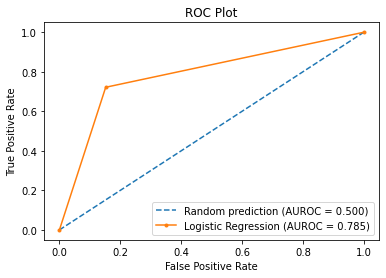

In [70]:
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % random_auc)
plt.plot(logReg_fpr, logReg_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logReg_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

- Apropriate threshold ~0.2 which maximize TPR and minimize FPR 